In [109]:
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# path names
root = Path().resolve()
path = root/'dataset'/'Henry_Mpro_pKa'

In [3]:
# the function to read data
def read_data(name):
    table_data = pd.DataFrame({})
    dataset_path = path/name
    for dp in dataset_path.iterdir():
        # structure.pdb does not need to be read here
        if dp.name != 'structure.pdb':
            temp_table = pd.read_table(dp, header=None, names=['#1', '#2'])
            temp_array = (list)(temp_table['#2'])
            table_data[dp.name] = temp_array
            warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
    return table_data

In [11]:
S01_table = read_data(name='S01')
S05_table = read_data(name='S05')
p12_table = read_data(name='p12')
p13_table = read_data(name='p13')

S01_index = list(S01_table)
S05_index = list(S05_table)
p12_index = list(p12_table)
p13_index = list(p13_table)

In [21]:
# judge whether two index lists are identical
def compare_index(idx1, idx2):
    return idx1 == idx2


S01_S05_equality = compare_index(S01_index, S05_index)
S01_p12_equality = compare_index(S01_index, p12_index)
S01_p13_equality = compare_index(S01_index, p13_index)
print("Results of comparison:")
print("Residues in S01 equals residues in S05:", S01_S05_equality)
print("Residues in S01 equals residues in p12:", S01_p12_equality)
print("Residues in S01 equals residues in p13:", S01_p13_equality)

Results of comparison:
Residues in S01 equals residues in S05: False
Residues in S01 equals residues in p12: False
Residues in S01 equals residues in p13: False


In [22]:
# find out the same residues in two subtrates
S01_S05_same = [x for x in S01_index if x in S05_index]
S01_p12_same = [x for x in S01_index if x in p12_index]
S01_p13_same = [x for x in S01_index if x in p13_index]

print("The number of same residues in S01 and S05:", len(S01_S05_same))
print("The number of same residues in S01 and p12:", len(S01_p12_same))
print("The number of same residues in S01 and p13:", len(S01_p13_same))
print("S01 & S05 have the same residues with S01 & p12:", S01_S05_same == S01_p12_same)
print("S01 & p12 have the same residues with S01 & p13:", S01_p12_same == S01_p13_same)

The number of same residues in S01 and S05: 156
The number of same residues in S01 and p12: 156
The number of same residues in S01 and p13: 156
S01 & S05 have the same residues with S01 & p12: True
S01 & p12 have the same residues with S01 & p13: True


* Through past analysis, it is clear that residues in S01 are different from those in S05, p12 and p13, but the equal parts between S01 and other three substrates are same.

In [23]:
same_residues = S01_S05_same

S01_special_residues = [x for x in S01_index if x not in same_residues]
S05_special_residues = [x for x in S05_index if x not in same_residues]
p12_special_residues = [x for x in p12_index if x not in same_residues]
p13_special_residues = [x for x in p13_index if x not in same_residues]

print("Special residues in S01:", S01_special_residues)
print("Special residues in S05:", S05_special_residues)
print("Special residues in p12:", p12_special_residues)
print("Special residues in p13:", p13_special_residues)

Special residues in S01: ['LYS_623', 'ARG_622']
Special residues in S05: ['GLU_621', 'LYS_616']
Special residues in p12: ['TYR_619', 'TYR_614', 'LYS_613', 'TYR_623']
Special residues in p13: ['TYR_614', 'LYS_613']


* Now let's focus on the same part among substrates.

In [28]:
S01_processed_table = S01_table.drop(columns=S01_special_residues)
S05_processed_table = S05_table.drop(columns=S05_special_residues)
p12_processed_table = p12_table.drop(columns=p12_special_residues)
p13_processed_table = p13_table.drop(columns=p13_special_residues)

In [43]:
def HIS164_corr(processed_data):
    corr_matrix = processed_data.corr(method="pearson")
    HIS164_data = corr_matrix[["HIS_164"]]
    HIS164_clean_data = HIS164_data.drop(index=["HIS_164"])
    return HIS164_clean_data


S01_HIS164_clean = HIS164_corr(S01_processed_table)
S05_HIS164_clean = HIS164_corr(S05_processed_table)
p12_HIS164_clean = HIS164_corr(p12_processed_table)
p13_HIS164_clean = HIS164_corr(p13_processed_table)

S01_HIS164_rename = S01_HIS164_clean.rename(columns={"HIS_164": "S01_HIS_164"})
S05_HIS164_rename = S05_HIS164_clean.rename(columns={"HIS_164": "S05_HIS_164"})
p12_HIS164_rename = p12_HIS164_clean.rename(columns={"HIS_164": "p12_HIS_164"})
p13_HIS164_rename = p13_HIS164_clean.rename(columns={"HIS_164": "p13_HIS_164"})

HIS164_merge = pd.concat([S01_HIS164_rename, S05_HIS164_rename, p12_HIS164_rename, p13_HIS164_rename], axis=1)
HIS164_merge

,S01_HIS_164,S05_HIS_164,p12_HIS_164,p13_HIS_164
LYS_137,0.021251,0.061837,-0.002430,-0.055954
GLU_288,0.002264,-0.030988,0.050511,-0.040579
LYS_367,0.031500,-0.057379,-0.000216,-0.086643
GLU_320,0.000222,0.040700,0.070262,0.063426
GLU_290,0.092488,0.020563,0.090179,0.138861
...,...,...,...,...
ASP_216,-0.040348,0.032228,0.120098,-0.102105
ASP_482,-0.030571,0.010847,-0.072482,0.006779
ASP_92,0.015247,0.012793,0.086029,-0.001627
ASP_535,-0.085972,-0.028581,0.041470,0.014678


* Set absolute threshold as 0.1 to filter correlation values.

In [64]:
HIS164_merge["S05-S01"] = HIS164_merge["S05_HIS_164"] - HIS164_merge["S01_HIS_164"]
HIS164_merge["p12-S01"] = HIS164_merge["p12_HIS_164"] - HIS164_merge["S01_HIS_164"]
HIS164_merge["p13-S01"] = HIS164_merge["p13_HIS_164"] - HIS164_merge["S01_HIS_164"]

HIS164_S05_S01 = HIS164_merge[["S05-S01"]]
HIS164_p12_S01 = HIS164_merge[["p12-S01"]]
HIS164_p13_S01 = HIS164_merge[["p13-S01"]]

HIS164_S05_S01_obvious = HIS164_S05_S01[(HIS164_S05_S01["S05-S01"] > 0.1) |
                                        (HIS164_S05_S01["S05-S01"] < -0.1)]
HIS164_p12_S01_obvious = HIS164_p12_S01[(HIS164_p12_S01["p12-S01"] > 0.1) |
                                        (HIS164_p12_S01["p12-S01"] < -0.1)]
HIS164_p13_S01_obvious = HIS164_p13_S01[(HIS164_p13_S01["p13-S01"] > 0.1) |
                                        (HIS164_p13_S01["p13-S01"] < -0.1)]

In [54]:
HIS164_merge.to_csv('./processed/subtract_results.csv')

In [69]:
S05_S01_merge = pd.concat([S01_HIS164_rename, S05_HIS164_rename], axis=1)
p12_S01_merge = pd.concat([S01_HIS164_rename, p12_HIS164_rename], axis=1)
p13_S01_merge = pd.concat([S01_HIS164_rename, p13_HIS164_rename], axis=1)

S05_S01_subtraction = pd.concat([S05_S01_merge, HIS164_S05_S01_obvious], axis=1, join="inner")
p12_S01_subtraction = pd.concat([p12_S01_merge, HIS164_p12_S01_obvious], axis=1, join="inner")
p13_S01_subtraction = pd.concat([p13_S01_merge, HIS164_p13_S01_obvious], axis=1, join="inner")

In [70]:
S05_S01_subtraction.to_csv('./processed/subtraction/S05_S01_filter.csv')
p12_S01_subtraction.to_csv('./processed/subtraction/p12_S01_filter.csv')
p13_S01_subtraction.to_csv('./processed/subtraction/p13_S01_filter.csv')

* Let's visualize the data.

In [72]:
S05_S01_index = S05_S01_subtraction.index.values.tolist()
p12_S01_index = p12_S01_subtraction.index.values.tolist()
p13_S01_index = p13_S01_subtraction.index.values.tolist()


def extract_orders(index):
    order_list = []
    for res in index:
        temp_order = res[4:]
        temp_num = int(temp_order)
        order_list.append(temp_num)
    return order_list


S05_S01_x = extract_orders(S05_S01_index)
p12_S01_x = extract_orders(p12_S01_index)
p13_S01_x = extract_orders(p13_S01_index)

In [81]:
# function used to sort x and y altogether
def sort_dict(x, dify):
    init_dict = {}
    for i in range(len(x)):
        init_dict[x[i]] = dify[i]
    sort_dict = sorted(init_dict.items(), key=lambda d: d[0], reverse=False)
    sort_x = []
    sort_dify = []
    for k, v in sort_dict:
        sort_x.append(k)
        sort_dify.append(v)
    return sort_x, sort_dify

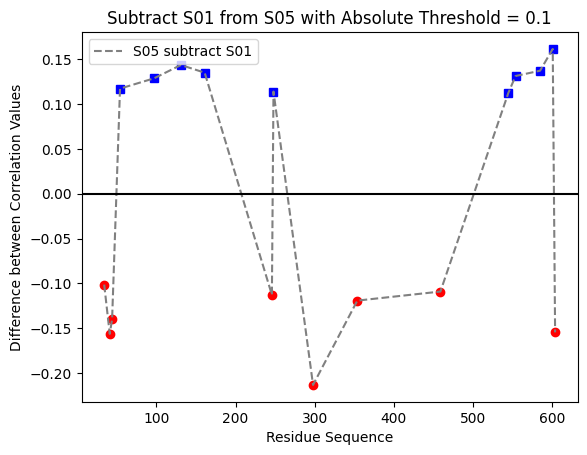

In [106]:
S05_sub_S01_y = list(S05_S01_subtraction["S05-S01"])
S05_S01_sort_x, S05_sub_S01_sort_y = sort_dict(S05_S01_x, S05_sub_S01_y)
for i in range(len(S05_S01_sort_x)):
    if S05_sub_S01_sort_y[i] > 0:
        plt.plot(S05_S01_sort_x[i], S05_sub_S01_sort_y[i], 'bs')
    elif S05_sub_S01_sort_y[i] < 0:
        plt.plot(S05_S01_sort_x[i], S05_sub_S01_sort_y[i], 'ro')
plt.plot(S05_S01_sort_x, S05_sub_S01_sort_y, color='gray', linestyle='--', label='S05 subtract S01')

plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Residue Sequence')
plt.ylabel('Difference between Correlation Values')
plt.legend(loc='best')
plt.title('Subtract S01 from S05 with Absolute Threshold = 0.1')
plt.savefig('./figure/correlation_subtract/S05_subtract_S01.png')
plt.show()

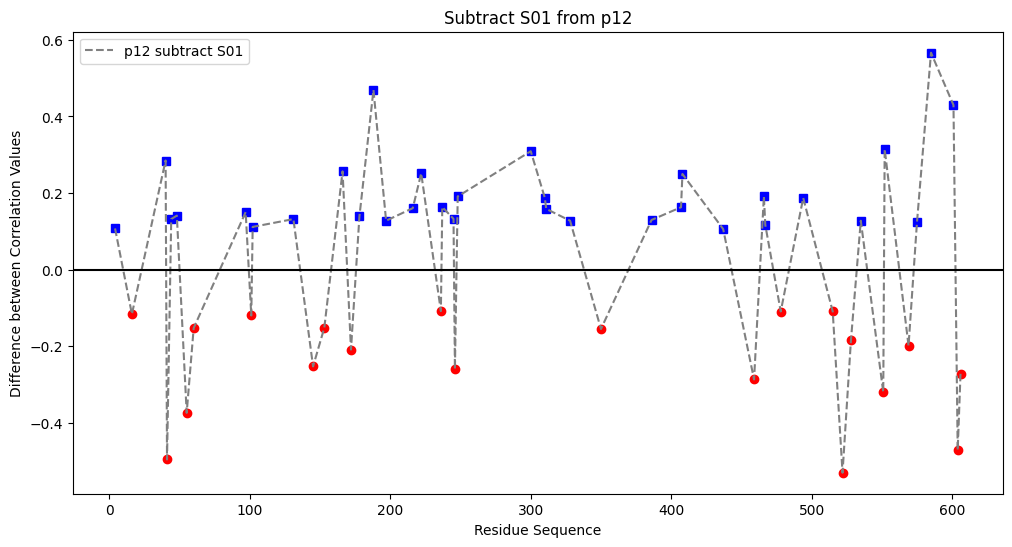

In [97]:
p12_sub_S01_y = list(p12_S01_subtraction["p12-S01"])
p12_S01_sort_x, p12_sub_S01_sort_y = sort_dict(p12_S01_x, p12_sub_S01_y)

plt.figure(figsize=(12, 6))
for i in range(len(p12_S01_sort_x)):
    if p12_sub_S01_sort_y[i] > 0:
        plt.plot(p12_S01_sort_x[i], p12_sub_S01_sort_y[i], 'bs')
    elif p12_sub_S01_sort_y[i] < 0:
        plt.plot(p12_S01_sort_x[i], p12_sub_S01_sort_y[i], 'ro')
plt.plot(p12_S01_sort_x, p12_sub_S01_sort_y, color='gray', linestyle='--', label='p12 subtract S01')

plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Residue Sequence')
plt.ylabel('Difference between Correlation Values')
plt.legend(loc='best')
plt.title('Subtract S01 from p12')
plt.show()

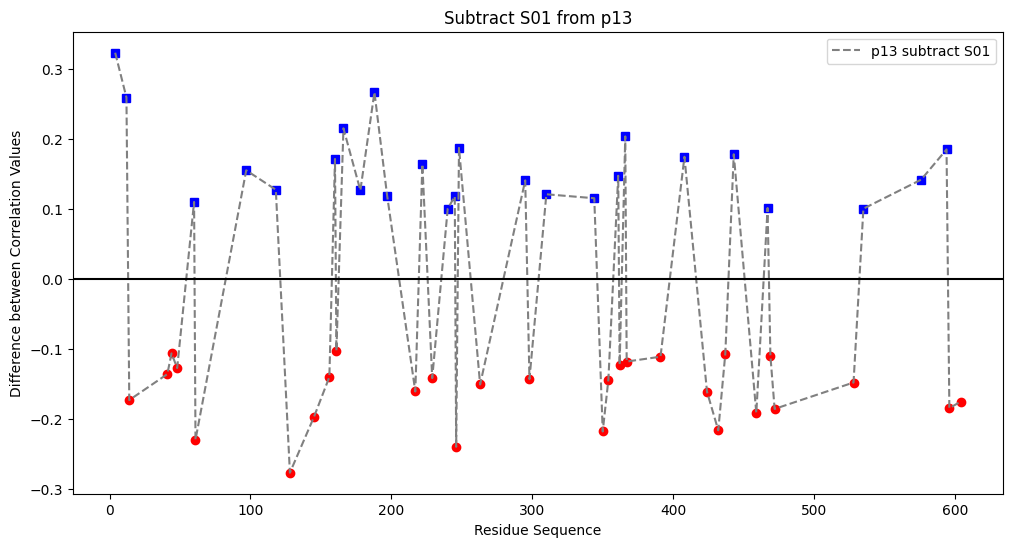

In [98]:
p13_sub_S01_y = list(p13_S01_subtraction["p13-S01"])
p13_S01_sort_x, p13_sub_S01_sort_y = sort_dict(p13_S01_x, p13_sub_S01_y)

plt.figure(figsize=(12, 6))
for i in range(len(p13_S01_sort_x)):
    if p13_sub_S01_sort_y[i] > 0:
        plt.plot(p13_S01_sort_x[i], p13_sub_S01_sort_y[i], 'bs')
    elif p13_sub_S01_sort_y[i] < 0:
        plt.plot(p13_S01_sort_x[i], p13_sub_S01_sort_y[i], 'ro')
plt.plot(p13_S01_sort_x, p13_sub_S01_sort_y, color='gray', linestyle='--', label='p13 subtract S01')

plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Residue Sequence')
plt.ylabel('Difference between Correlation Values')
plt.legend(loc='best')
plt.title('Subtract S01 from p13')
plt.show()

* There are so many points in p12-S01 and p13-S01. To simplify the plots, changing the threshold to suitables values.

In [102]:
# set the threshold as -0.2 and 0.2
p12_S01_simplify = p12_S01_subtraction[(p12_S01_subtraction["p12-S01"] > 0.2) |
                                       (p12_S01_subtraction["p12-S01"] < -0.2)]
p13_S01_simplify = p13_S01_subtraction[(p13_S01_subtraction["p13-S01"] > 0.2) |
                                       (p13_S01_subtraction["p13-S01"] < -0.2)]

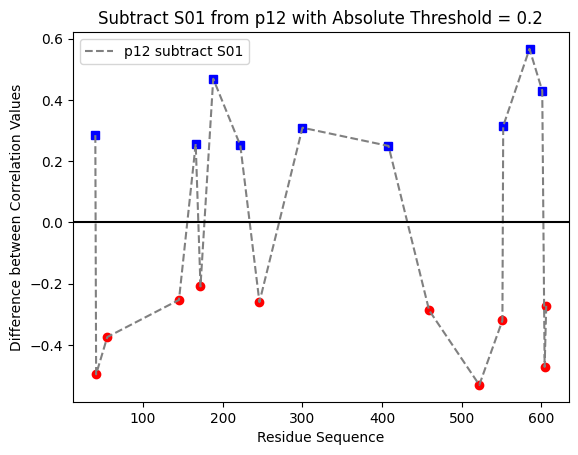

In [107]:
p12_S01_index = p12_S01_simplify.index.values.tolist()
p12_S01_x = extract_orders(p12_S01_index)
p12_sub_S01_y = list(p12_S01_simplify["p12-S01"])
p12_S01_sort_x, p12_sub_S01_sort_y = sort_dict(p12_S01_x, p12_sub_S01_y)

for i in range(len(p12_S01_sort_x)):
    if p12_sub_S01_sort_y[i] > 0:
        plt.plot(p12_S01_sort_x[i], p12_sub_S01_sort_y[i], 'bs')
    elif p12_sub_S01_sort_y[i] < 0:
        plt.plot(p12_S01_sort_x[i], p12_sub_S01_sort_y[i], 'ro')
plt.plot(p12_S01_sort_x, p12_sub_S01_sort_y, color='gray', linestyle='--', label='p12 subtract S01')

plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Residue Sequence')
plt.ylabel('Difference between Correlation Values')
plt.legend(loc='best')
plt.title('Subtract S01 from p12 with Absolute Threshold = 0.2')
plt.savefig('./figure/correlation_subtract/p12_subtract_S01.png')
plt.show()

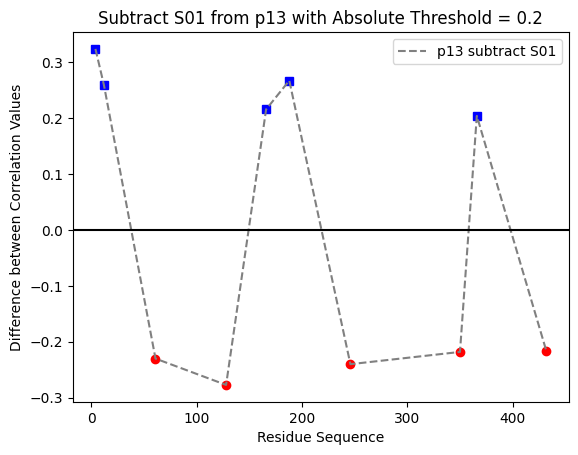

In [108]:
p13_S01_index = p13_S01_simplify.index.values.tolist()
p13_S01_x = extract_orders(p13_S01_index)
p13_sub_S01_y = list(p13_S01_simplify["p13-S01"])
p13_S01_sort_x, p13_sub_S01_sort_y = sort_dict(p13_S01_x, p13_sub_S01_y)

for i in range(len(p13_S01_sort_x)):
    if p13_sub_S01_sort_y[i] > 0:
        plt.plot(p13_S01_sort_x[i], p13_sub_S01_sort_y[i], 'bs')
    elif p13_sub_S01_sort_y[i] < 0:
        plt.plot(p13_S01_sort_x[i], p13_sub_S01_sort_y[i], 'ro')
plt.plot(p13_S01_sort_x, p13_sub_S01_sort_y, color='gray', linestyle='--', label='p13 subtract S01')

plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Residue Sequence')
plt.ylabel('Difference between Correlation Values')
plt.legend(loc='best')
plt.title('Subtract S01 from p13 with Absolute Threshold = 0.2')
plt.savefig('./figure/correlation_subtract/p13_subtract_S01.png')
plt.show()

In [125]:
S05_S01_HIS164 = S05_S01_subtraction[["S05-S01"]]
p12_S01_HIS164 = p12_S01_simplify[["p12-S01"]]
p13_S01_HIS164 = p13_S01_simplify[["p13-S01"]]

S05_S01_sort = S05_S01_HIS164.sort_values(by=["S05-S01"], ascending=False)
p12_S01_sort = p12_S01_HIS164.sort_values(by=["p12-S01"], ascending=False)
p13_S01_sort = p13_S01_HIS164.sort_values(by=["p13-S01"], ascending=False)

S05_S01_display = S05_S01_sort.rename(columns={"S05-S01": "S05-S01 HIS164"})
p12_S01_display = p12_S01_sort.rename(columns={"p12-S01": "p13-S01 HIS164"})
p13_S01_display = p13_S01_sort.rename(columns={"p13-S01": "p13-S01 HIS164"})

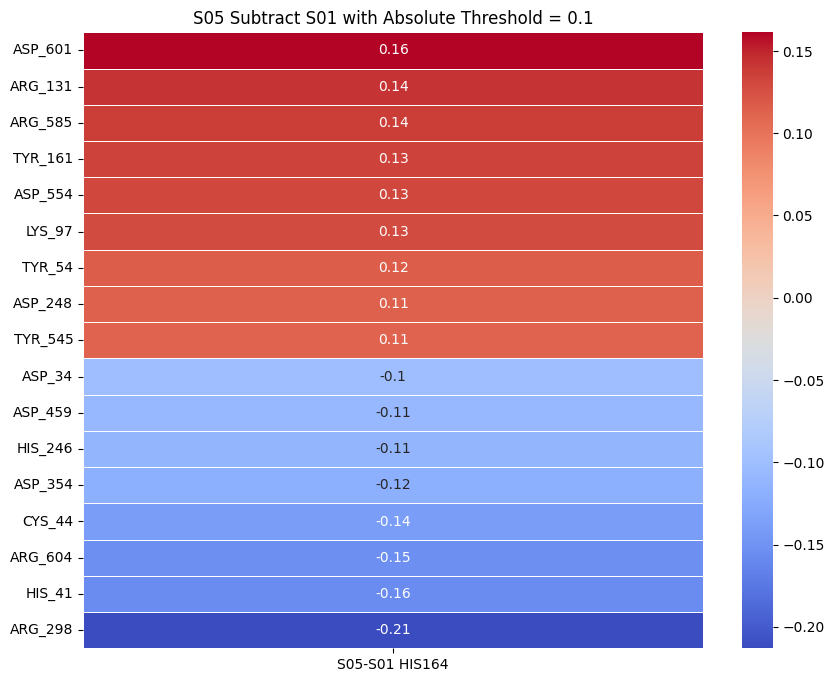

In [127]:
plt.figure(figsize=(10, 8))
plot = sns.heatmap(S05_S01_display, linewidths=0.5, cmap='coolwarm', annot=True)
plt.title('S05 Subtract S01 with Absolute Threshold = 0.1')
plt.savefig('./figure/correlation_subtract/S05_S01_heatmap.png')
plt.show()

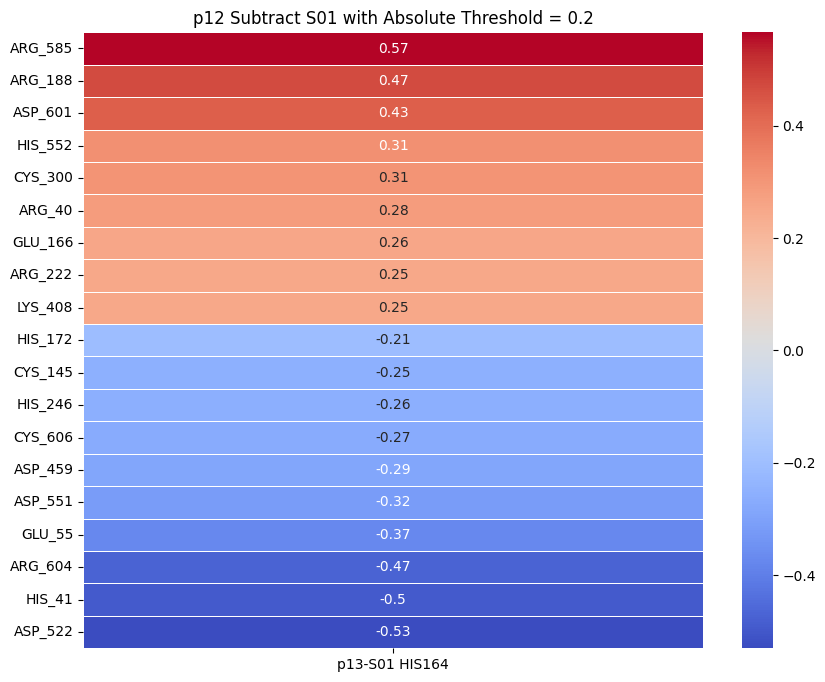

In [128]:
plt.figure(figsize=(10, 8))
plot = sns.heatmap(p12_S01_display, linewidths=0.5, cmap='coolwarm', annot=True)
plt.title('p12 Subtract S01 with Absolute Threshold = 0.2')
plt.savefig('./figure/correlation_subtract/p12_S01_heatmap.png')
plt.show()

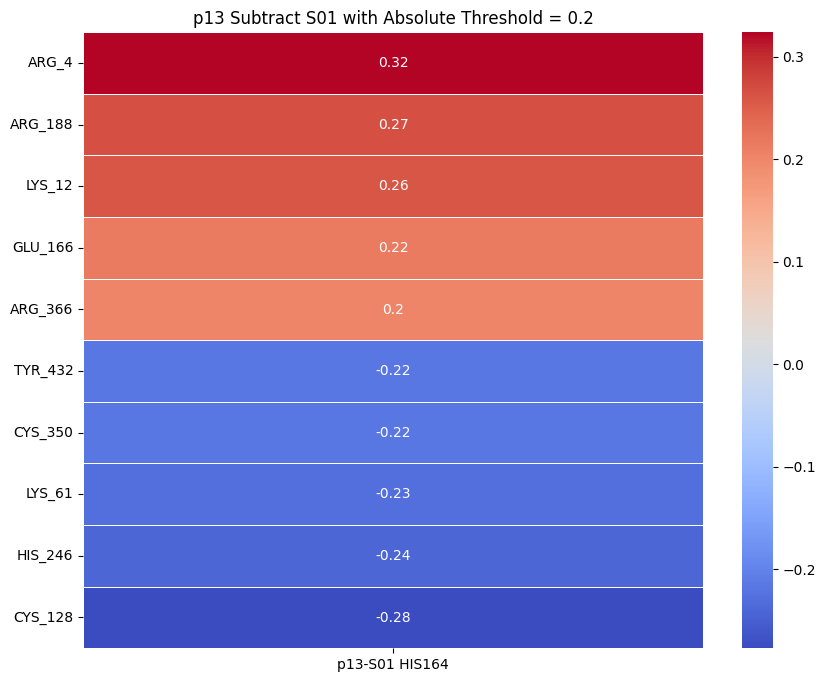

In [129]:
plt.figure(figsize=(10, 8))
plot = sns.heatmap(p13_S01_display, linewidths=0.5, cmap='coolwarm', annot=True)
plt.title('p13 Subtract S01 with Absolute Threshold = 0.2')
plt.savefig('./figure/correlation_subtract/p13_S01_heatmap.png')
plt.show()